In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

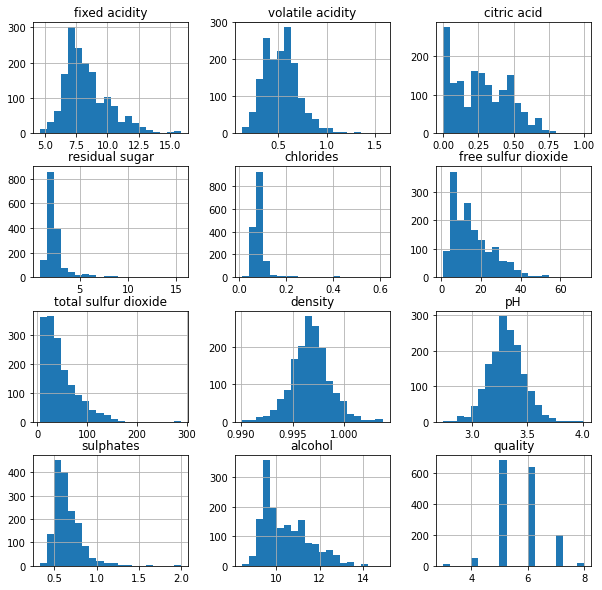

In [ ]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

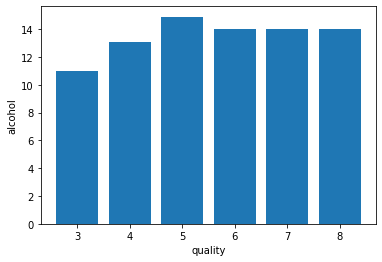

In [ ]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

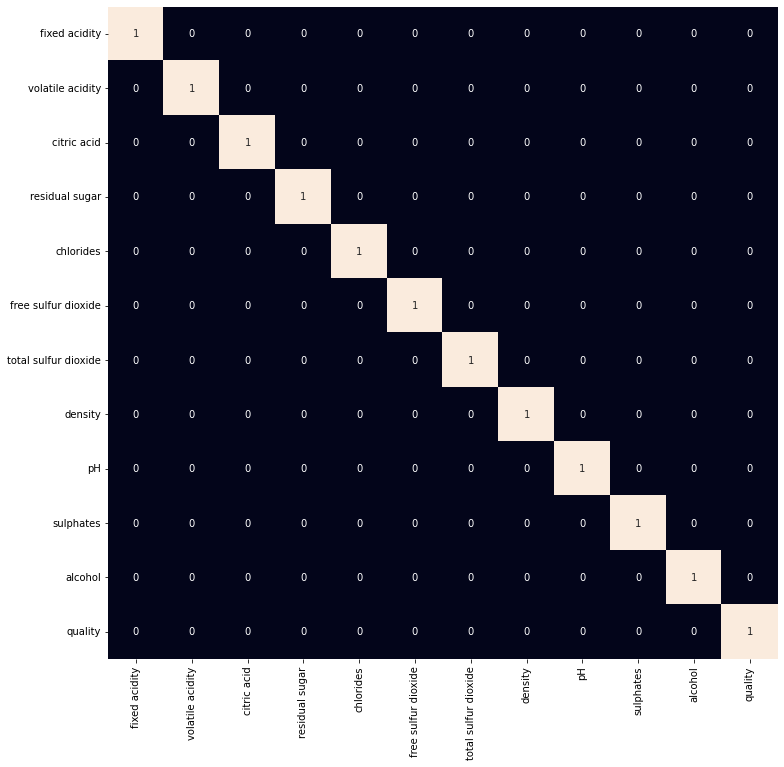

In [ ]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [ ]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns="quality", axis = 1)
y = df['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)

norm = StandardScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1439, 11) (160, 11) (1439,) (160,)


In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_dim=11, activation='relu') )
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])


hist=model.fit(x_train, y_train,batch_size=x_train.shape[0], epochs=100, validation_split=0.1, verbose=1)

Epoch 1/100
1/1 [==============================] - 1s 691ms/step - loss: 0.8600 - accuracy: 0.1367 - val_loss: 0.8151 - val_accuracy: 0.1319
Epoch 2/100
1/1 [==============================] - 0s 36ms/step - loss: 0.8032 - accuracy: 0.1506 - val_loss: 0.7629 - val_accuracy: 0.2083
Epoch 3/100
1/1 [==============================] - 0s 45ms/step - loss: 0.7546 - accuracy: 0.2046 - val_loss: 0.7189 - val_accuracy: 0.3403
Epoch 4/100
1/1 [==============================] - 0s 38ms/step - loss: 0.7137 - accuracy: 0.3467 - val_loss: 0.6814 - val_accuracy: 0.5694
Epoch 5/100
1/1 [==============================] - 0s 61ms/step - loss: 0.6795 - accuracy: 0.5629 - val_loss: 0.6496 - val_accuracy: 0.7361
Epoch 6/100
1/1 [==============================] - 0s 56ms/step - loss: 0.6506 - accuracy: 0.7459 - val_loss: 0.6227 - val_accuracy: 0.8403
Epoch 7/100
1/1 [==============================] - 0s 97ms/step - loss: 0.6255 - accuracy: 0.8456 - val_loss: 0.5987 - val_accuracy: 0.8681
Epoch 8/100
1/1 [==

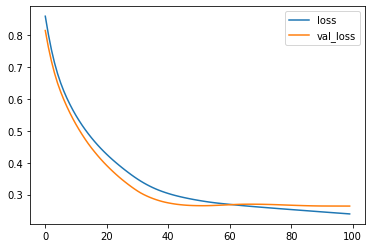

In [ ]:
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [ ]:
result = model.evaluate(x_test, y_test)
print(model.metrics_names)
result

5/5 [==============================] - 0s 2ms/step - loss: 0.2393 - accuracy: 0.8875
['loss', 'accuracy']


[0.2393454760313034, 0.887499988079071]